<a href="https://colab.research.google.com/github/jiachun23/StudentDropout_ChurnPrediction/blob/main/ChurnPrediciton_NN(TF_Keras).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
# Importing packages
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Importing and cleaning the data
train_data = pd.read_csv('/content/drive/MyDrive/Dataset/DBS.csv', sep=';')
test_data = pd.read_csv('/content/drive/MyDrive/Dataset/DBS_2020.csv', sep=';')
train_data.head()

,access,tests,tests_grade,exam,project,project_grade,assignments,result_points,result_grade,graduate,year,acad_year
0,1256,57.00,A,19,91.54,A,40.0,189.92,A,1,2019,2019/2020
1,985,42.87,B,19,75.96,A,13.7,189.43,A,1,2017,2017/2018
2,1455,54.50,A,16,96.79,A,40.0,188.91,A,1,2019,2019/2020
3,998,54.50,A,16,93.36,A,40.0,186.85,A,1,2019,2019/2020
4,1347,55.00,A,16,92.86,A,39.0,186.38,A,1,2019,2019/2020


In [4]:
test_data.head()

,access,tests,tests_grade,exam,project,project_grade,assignments,result_points,result_grade,graduate,year,acad_year
0,794,68.10,A,19.40,100.23,A,37,235.34,A,1,2020,2020/2021
1,844,57.85,C,12.57,96.14,A,32,215.75,B,1,2020,2020/2021
2,658,64.60,B,17.57,101.59,A,37,224.27,B,1,2020,2020/2021
3,1193,56.93,C,13.28,102.31,A,36,216.56,B,1,2020,2020/2021
4,1400,61.35,C,15.40,93.72,B,34,214.72,B,1,2020,2020/2021


In [5]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from numpy import where
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn import preprocessing

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [9]:
from tensorflow import keras
from keras.utils import np_utils

In [10]:
X_train = np.asarray(train_data[['access', 'tests', 'assignments']])
y_train = np.asarray(train_data['graduate'])

In [11]:
X_test = np.asarray(test_data[['access', 'tests', 'assignments']])
y_test = np.asarray(test_data['graduate'])

In [13]:
data = train_data[['access','tests','assignments','graduate']]
data.head()

,access,tests,assignments,graduate
0,1256,57.00,40.0,1
1,985,42.87,13.7,1
2,1455,54.50,40.0,1
3,998,54.50,40.0,1
4,1347,55.00,39.0,1


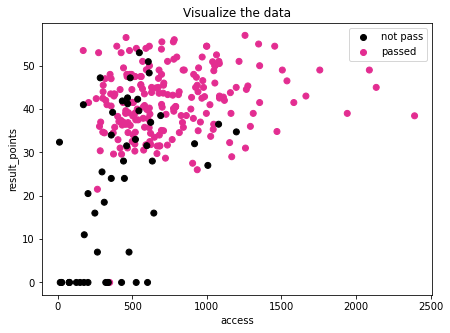

In [14]:
# Visualization of data
X_train = data.iloc[:,:3].values
y_train = data.iloc[:,3].values

y_train = np.where(y_train== 0.0,-1,1)
    
cm_bright = ListedColormap(['#000000', '#E32D91'])
plt.figure(figsize=(7,5))
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=cm_bright)
plt.scatter(None, None, color = '#000000', label='not pass')
plt.scatter(None, None, color = '#E32D91', label='passed')
plt.legend()

plt.title('Visualize the data')
plt.xlabel('access')
plt.ylabel('result_points')
plt.show()

In [16]:
X_train = data.iloc[:,:3]
y_train = data.iloc[:,3]

standardized_X_train = preprocessing.scale(X_train)
standardized_X_test = preprocessing.scale(X_test)

In [17]:
# Transform the dataset
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(standardized_X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [18]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense

# Define the Keras model
model = Sequential()


model.add(Dense(128, activation='relu', kernel_initializer='random_normal', input_dim=3))
model.add(Dense(64, activation='relu', kernel_initializer='random_normal'))
model.add(Dense(64, activation='relu', kernel_initializer='random_normal'))

model.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [19]:
# Compile the Keras model
model.compile(optimizer ='adam', loss='mean_squared_error', metrics =['accuracy'])

In [22]:
# Fit the Keras model on the dataset
history = model.fit(X_train, y_train, batch_size=5, epochs=10, validation_data=(standardized_X_test,y_test))

Epoch 1/10
84/84 [==============================] - 0s 4ms/step - loss: 0.1124 - accuracy: 0.8333 - val_loss: 0.0628 - val_accuracy: 0.9500
Epoch 2/10
84/84 [==============================] - 0s 3ms/step - loss: 0.1103 - accuracy: 0.8405 - val_loss: 0.0564 - val_accuracy: 0.9500
Epoch 3/10
84/84 [==============================] - 0s 3ms/step - loss: 0.1082 - accuracy: 0.8476 - val_loss: 0.0494 - val_accuracy: 0.9500
Epoch 4/10
84/84 [==============================] - 0s 3ms/step - loss: 0.1081 - accuracy: 0.8405 - val_loss: 0.0552 - val_accuracy: 0.9500
Epoch 5/10
84/84 [==============================] - 0s 3ms/step - loss: 0.1033 - accuracy: 0.8476 - val_loss: 0.0562 - val_accuracy: 0.9500
Epoch 6/10
84/84 [==============================] - 0s 3ms/step - loss: 0.1027 - accuracy: 0.8595 - val_loss: 0.0550 - val_accuracy: 0.9500
Epoch 7/10
84/84 [==============================] - 0s 3ms/step - loss: 0.1098 - accuracy: 0.8429 - val_loss: 0.0524 - val_accuracy: 0.9500
Epoch 8/10
84/84 [==

In [24]:
# Evaluate the Keras model
eval_model= model.evaluate(X_test, y_test)
eval_model

2/2 [==============================] - 0s 8ms/step - loss: 0.2333 - accuracy: 0.7667


[0.23333333432674408, 0.7666666507720947]

In [26]:
# Predictions
y_pred = model.predict(standardized_X_test)
y_pred = (y_pred>0.5)

In [27]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[12  2]
 [ 2 44]]


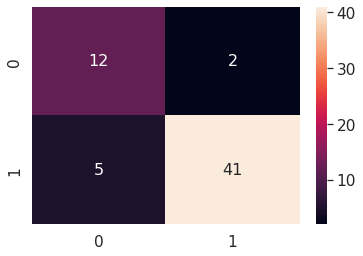

In [28]:
# Confusion matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = [[12,2],
        [5,41]]  

df_cm = pd.DataFrame(array, range(2),
                  range(2))
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})

In [29]:
# Accuracy
print("\nAccuracy: %.2f%%" % (eval_model[1]*100))


Accuracy: 76.67%


In [30]:
# Classificaton report
from sklearn.metrics import classification_report # evaluation metric
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.96      0.96      0.96        46

    accuracy                           0.93        60
   macro avg       0.91      0.91      0.91        60
weighted avg       0.93      0.93      0.93        60

